# 서울시 구별 CCTV 현황 분석 
- 서울시 열린데이터에서 수집 
  - 서울시 자치구 연도별 CCTV 설치 현황 
  - 서울시 인구통계 

In [1]:
# 한글 패키지 설치 
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* 서울시 CCTV 데이터 확인
  - 데이터 전처리

In [3]:
seoul_cctv = pd.read_csv('seoul_cctv.csv', encoding='utf-8', thousands=',')
seoul_cctv.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [5]:
seoul_cctv.rename(columns={seoul_cctv.columns[0]: '구별', seoul_cctv.columns[1]:'소계', }, inplace = True)
seoul_cctv.head()

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [6]:
# 상위 5개구를 확인 
seoul_cctv.sort_values(by='소계', ascending=False).head()

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213


In [7]:
# 최근 3년간과 그 이전 3년간 CCTV 증가율 계산 
seoul_cctv['최근증가율'] = (seoul_cctv['2018년'] + seoul_cctv['2019년'] + seoul_cctv['2020년'])/(seoul_cctv['2017년']+seoul_cctv['2016년']+seoul_cctv['2015년'])*100
seoul_cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,479.510022
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486,388.842105
24,송파구,2743,64,9,61,86,85,215,146,241,542,1068,226,304.983389
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213,252.083333
25,강동구,2547,223,45,27,227,49,154,202,273,377,356,614,214.149444


* 서울시 인구 데이터 확인하기
  - 데이터 전처리

In [8]:
# 서울시 인구 데이터 읽어오기
seoul_pop = pd.read_excel('report.xls', header=2)
seoul_pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.1/4,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
1,2021.1/4,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
2,2021.1/4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767
3,2021.1/4,용산구,112881,243336,118120,125216,229013,110181,118832,14323,7939,6384,2.03,39575
4,2021.1/4,성동구,135883,298421,145358,153063,291906,142506,149400,6515,2852,3663,2.15,45968


In [9]:
#필요한 컬럼만 추출 
seoul_pop = seoul_pop.iloc[:, [1,3,6,9,13]]
seoul_pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [10]:
# 컬럼 이름 수정 
seoul_pop.rename(columns={seoul_pop.columns[0]:'구별',
                          seoul_pop.columns[1]:'인구수',
                          seoul_pop.columns[2]:'한국인',
                          seoul_pop.columns[3]:'외국인',
                          seoul_pop.columns[4]:'고령자',
                          }, inplace=True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [11]:
# 합계 열 삭제
seoul_pop.drop([0], inplace=True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


In [12]:
# 외국인비율, 고령자 비율 계산 
seoul_pop['외국인비율'] =  seoul_pop['외국인'] / seoul_pop['인구수'] *100
seoul_pop['고령자비율'] =  seoul_pop['고령자'] / seoul_pop['인구수'] *100
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,156567,147296,9271,27781,5.921427,17.743841
2,중구,133708,124552,9156,24767,6.847758,18.523200
3,용산구,243336,229013,14323,39575,5.886100,16.263520
4,성동구,298421,291906,6515,45968,2.183157,15.403742
5,광진구,356191,343392,12799,50370,3.593297,14.141289


In [13]:
# 인구수로 정렬 
seoul_pop.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
23,강남구,539538,534796,4742,75602,0.878900,14.012359
11,노원구,522225,518278,3947,85906,0.755804,16.449998
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [14]:
# 외국인 수로 정렬 
seoul_pop.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,426675,401074,25601,70717,6.000117,16.573973
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
3,용산구,243336,229013,14323,39575,5.886100,16.263520
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [15]:
# 외국인 비율로 정렬
seoul_pop.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133708,124552,9156,24767,6.847758,18.523200
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
17,구로구,426675,401074,25601,70717,6.000117,16.573973
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [16]:
# 고령자 수로 정렬 
seoul_pop.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
11,노원구,522225,518278,3947,85906,0.755804,16.449998
12,은평구,479607,475501,4106,85140,0.856118,17.752034
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [17]:
# 고령자 비율로 정렬 
seoul_pop.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,307537,304078,3459,62893,1.124743,20.450547
10,도봉구,323752,321717,2035,62360,0.628568,19.261657
2,중구,133708,124552,9156,24767,6.847758,18.523200
12,은평구,479607,475501,4106,85140,0.856118,17.752034
1,종로구,156567,147296,9271,27781,5.921427,17.743841


* 데이터 merge

In [18]:
# 필요데이텀 추출 
seoul_cctv = seoul_cctv[['구별', '소계', '최근증가율']]

In [19]:
data_result = pd.merge(seoul_cctv, seoul_pop, on='구별')
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,71.707317,156567,147296,9271,27781,5.921427,17.743841
1,용산구,2383,120.574713,243336,229013,14323,39575,5.886100,16.263520
2,성동구,3515,78.591353,298421,291906,6515,45968,2.183157,15.403742
3,광진구,2556,163.878788,356191,343392,12799,50370,3.593297,14.141289
4,동대문구,2315,106.250000,352570,338875,13695,60868,3.884335,17.264089


In [20]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,71.707317,156567,147296,9271,27781,5.921427,17.743841
용산구,2383,120.574713,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,78.591353,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,163.878788,356191,343392,12799,50370,3.593297,14.141289
동대문구,2315,106.250000,352570,338875,13695,60868,3.884335,17.264089


* correlation 확인

In [21]:
# 고령자 비율과 관련성 적음 
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.39903693],
       [-0.39903693,  1.        ]])

In [22]:
# 외국인 비율과도 큰 관련성이 없어 보임 
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.10508014],
       [-0.10508014,  1.        ]])

In [23]:
# 인구수와는 관련성이 있음 
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.42267883],
       [0.42267883, 1.        ]])

* 수평 바 그래프로 확인 

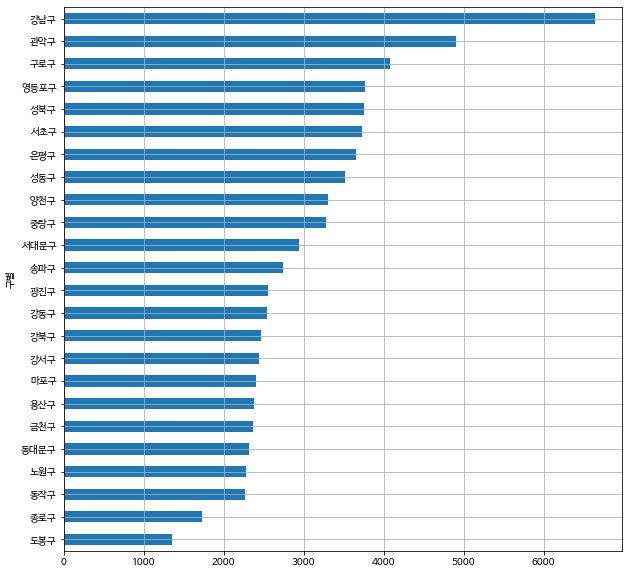

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

plt.figure(figsize=(10,10))
data_result['소계'].sort_values().plot(kind='barh', rot=0, grid=True)
                              
plt.show()

* scatter plot

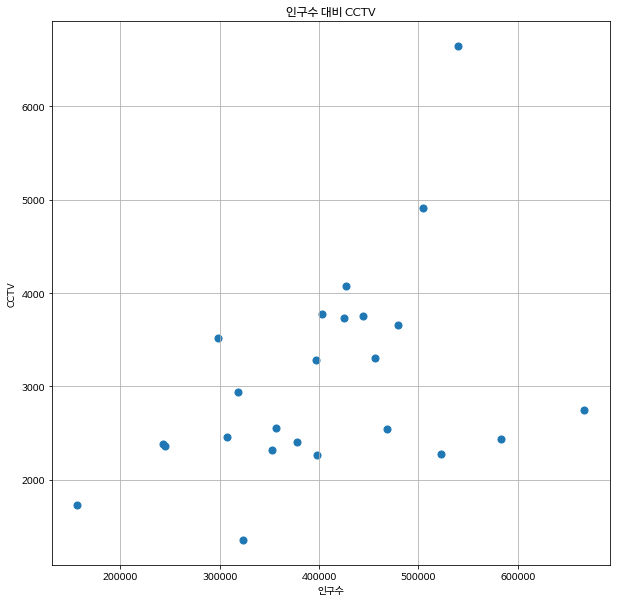

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.title('인구수 대비 CCTV')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [38]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([4.05606783e-03, 1.42120470e+03])

In [41]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

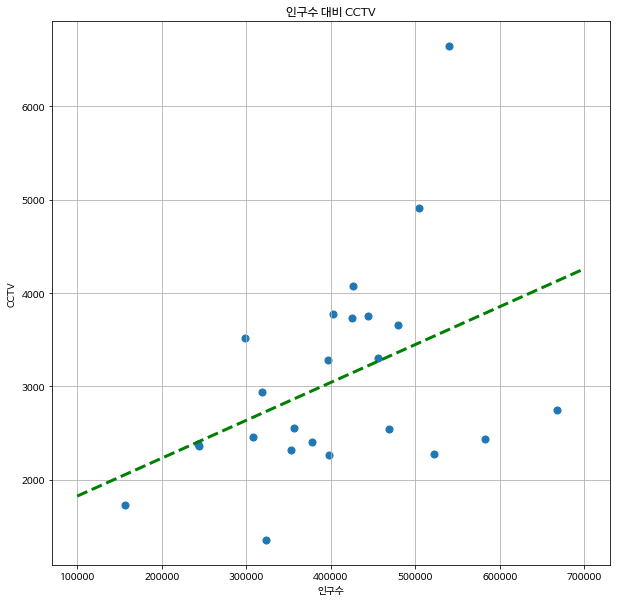

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='--', lw=3, color='g')
plt.title('인구수 대비 CCTV')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* 1D Fitting 에러 계산 

In [44]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,6645,78.295311,539538,534796,4742,75602,0.878900,14.012359,3035.392574
관악구,4909,83.734310,504140,490352,13788,78400,2.734955,15.551236,1442.969263
송파구,2743,304.983389,667115,661411,5704,94145,0.855025,14.112260,1384.068392
도봉구,1356,169.086022,323752,321717,2035,62360,0.628568,19.261657,1378.364772
강서구,2437,124.361949,582804,577320,5484,89377,0.940968,15.335687,1348.097257


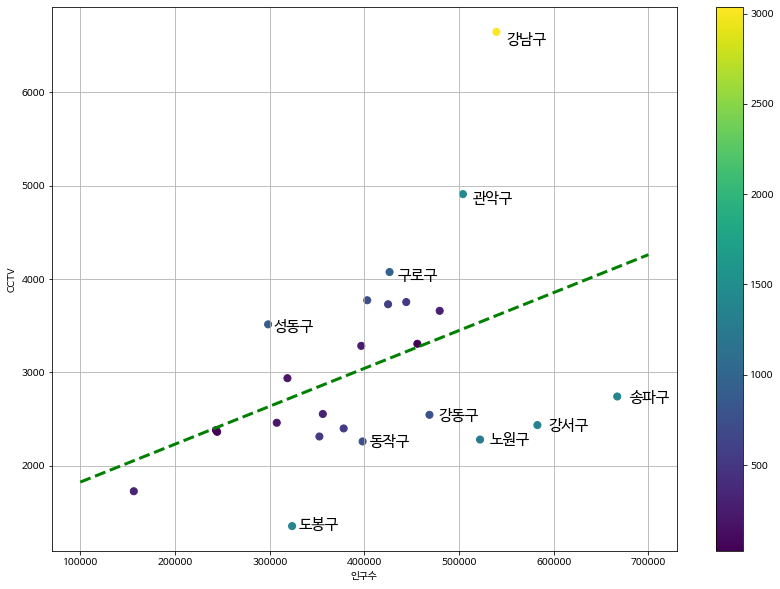

In [45]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='--', lw=3, color='g')

for n in range(10):
  plt.text(df_sort['인구수'][n] *1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)


plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.colorbar()
plt.grid()
plt.show()